# Import Utilities

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
os.chdir('/content/gdrive/My Drive/')

In [0]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

In [0]:
viram = pd.read_csv("comment_vibharam-hospital.csv")
viram = viram.reset_index()
viram = viram.rename(columns={"index": "cid"})

# Comment Translation 

In [14]:
!pip install googletrans
!pip install tqdm --upgrade
!pip install twython

     |████████████████████████████████| 61kB 2.9MB/s 
  Found existing installation: tqdm 4.38.0
    Uninstalling tqdm-4.38.0:
      Successfully uninstalled tqdm-4.38.0


In [0]:
from googletrans import Translator
from tqdm import tqdm

In [0]:
def th2en(comment):
  return Translator().translate(comment, src="th", dest="en").text

In [18]:
tqdm.pandas()

viram["en"] = viram.progress_apply(lambda x: th2en(x["comment"]), axis=1)



  0%|          | 0/183 [00:00<?, ?it/s]

  1%|          | 2/183 [00:01<02:58,  1.02it/s]

  2%|▏         | 3/183 [00:02<02:50,  1.06it/s]

  2%|▏         | 4/183 [00:03<02:54,  1.03it/s]

  3%|▎         | 5/183 [00:06<04:12,  1.42s/it]

  3%|▎         | 6/183 [00:06<03:28,  1.18s/it]

  4%|▍         | 7/183 [00:08<03:36,  1.23s/it]

  4%|▍         | 8/183 [00:10<04:08,  1.42s/it]

  5%|▍         | 9/183 [00:10<03:17,  1.13s/it]

  5%|▌         | 10/183 [00:12<04:12,  1.46s/it]

  6%|▌         | 11/183 [00:13<03:43,  1.30s/it]

  7%|▋         | 12/183 [00:14<03:16,  1.15s/it]

  7%|▋         | 13/183 [00:16<03:38,  1.29s/it]

  8%|▊         | 15/183 [00:17<03:04,  1.10s/it]

  9%|▊         | 16/183 [00:19<03:57,  1.42s/it]

  9%|▉         | 17/183 [00:20<03:28,  1.25s/it]

 10%|▉         | 18/183 [00:23<04:51,  1.76s/it]

 10%|█         | 19/183 [00:26<05:55,  2.17s/it]

 11%|█         | 20/183 [00:27<04:52,  1.80s/it]

 11%|█▏        | 21/183 [00:28<03:59,  1.48s/it]

 12%|█▏        

# Sentence Tokenize and Sentence-level sentiment

In [19]:
import nltk
from nltk import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
nltk.download('punkt')



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
sentences = []
cids = []
for cid in viram["cid"]:
    s = sent_tokenize(viram.loc[cid, "en"])
    sentences = sentences + s
    cids = cids + [cid] * len(s)

In [0]:
def predict_sentiment(sentence):
  sa = SentimentIntensityAnalyzer()
  sentiment_distribution = sa.polarity_scores(sentence)
  score = sentiment_distribution.get("compound")
  
  if score >= 0.05:
    return "positive"
  elif score <= -0.05:
    return "negative"
  else:
    return "neutral"

In [22]:
sentiments = []
for sentence in tqdm_notebook(sentences, total=len(sentences)):
    sentiments.append(predict_sentiment(sentence))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


# Parsing

In [23]:
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize, pos_tag, RegexpParser

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
grammar = """NP: {<NN|NNS>+}
                 {<NN|NNS>+<CC><NN|NNS>+}"""
chunker = RegexpParser(grammar)
parse_trees = []
for sentence in sentences:
    parse_trees.append(chunker.parse(pos_tag(word_tokenize(sentence))))

In [25]:
parse_trees

[Tree('S', [('Took', 'VB'), ('my', 'PRP$'), Tree('NP', [('car', 'NN'), ('crash', 'NN'), ('None', 'NN')]), ('of', 'IN'), ('the', 'DT'), Tree('NP', [('parties', 'NNS')]), ('have', 'VBP'), ('a', 'DT'), Tree('NP', [('car', 'NN'), ('insurance', 'NN')]), ('with', 'IN'), ('the', 'DT'), ('Social', 'NNP'), ('Security', 'NNP'), ('Act', 'NNP'), ('itself', 'PRP'), ('.', '.')]),
 Tree('S', [('Fortunately', 'RB'), (',', ','), ('the', 'DT'), Tree('NP', [('surgeon', 'NN'), ('emergency', 'NN')]), ('a', 'DT'), Tree('NP', [('fast', 'NN')]), (',', ','), ('do', 'VBP'), ('not', 'RB'), ('be', 'VB'), ('tortured', 'VBN'), ('again', 'RB'), ('fencing', 'VBG'), ('also', 'RB'), ('polite', 'VBP'), (',', ','), ('even', 'RB'), ('in', 'IN'), ('the', 'DT'), Tree('NP', [('name', 'NN')]), (',', ','), ('Social', 'NNP'), ('Security', 'NNP'), ('or', 'CC'), ('the', 'DT'), Tree('NP', [('year', 'NN')]), ('through', 'IN'), Tree('NP', [('bird', 'NN')]), ('Act', 'NNP'), ('of', 'IN'), ('the', 'DT'), Tree('NP', [('hospital', 'NN')]

# Extract Noun Phrase

In [0]:
def extract_np(parsed_tree):
    nps = []
    for subtree in parsed_tree.subtrees():
        if subtree.label() == 'NP':
            t = subtree
            t = " ".join(word for word, tag in t.leaves())
            nps.append(t)
    return nps

In [0]:
nps = []
for parse_tree in parse_trees:
    nps.append(extract_np(parse_tree))

In [28]:
nps

[['car crash None', 'parties', 'car insurance'],
 ['surgeon emergency', 'fast', 'name', 'year', 'bird', 'hospital', 'cost'],
 ['hospital', 'cost', 'cash', 'costs'],
 ['assistant nursing care', 'time'],
 ['Appointments', 'neat'],
 ['services', 'hospital'],
 ['care', 'doctor', 'appointment process'],
 [],
 ['doctors', 'care', 'doctor', 'lot'],
 ['delivery room',
  'child',
  'brothers',
  'nurseries kind',
  'care',
  'mother',
  'child performance',
  'services'],
 [],
 ['service', 'doctor', 'kind', 'cute nurse', 'parking'],
 ['equipment', 'bathrooms', 'corridors', 'food'],
 ['hospital'],
 ['specialist'],
 ['Nursing', 'personnel', 'others', 'cute'],
 ['Injection'],
 ['nurses', 'patients', 'doctor', 'effort', 'patient', 'doctor'],
 ['patient'],
 ['Patients', 'hospital', 'patient', 'enclosure', 'hospital'],
 ['nursing care', 'treatment'],
 ['love', 'parking'],
 ['equipment', 'bathrooms', 'corridors', 'food'],
 ['hospital'],
 ['specialist'],
 ['Nursing', 'personnel', 'others', 'cute'],
 ['

# Put information into DataFrame

In [0]:
viramho = pd.DataFrame({"cids": cids, 
                   "sentences": sentences, 
                   "sentiments": sentiments, 
                   "NP": nps})

In [30]:
viramho.head()

,cids,sentences,sentiments,NP
0,0,Took my car crash None of the parties have a c...,negative,"[car crash None, parties, car insurance]"
1,0,"Fortunately, the surgeon emergency a fast, do ...",positive,"[surgeon emergency, fast, name, year, bird, ho..."
2,0,Min hospital had to calculate the cost to make...,neutral,"[hospital, cost, cash, costs]"
3,0,And assistant nursing care was out of time.,positive,"[assistant nursing care, time]"
4,0,"Appointments made a neat, clean, clear",positive,"[Appointments, neat]"


# Split dataframe into positive and negative sentiment

In [0]:
pos = viramho[viramho["sentiments"] == "positive"].reset_index(drop=True)
pos_words = sum(pos["NP"].tolist(), [])
pos_words = [word.lower() for word in pos_words]
poshist = pd.DataFrame({"words": pos_words})
poshist = poshist.groupby("words").size().reset_index(name="#pos")

In [0]:
neg = viramho[viramho["sentiments"] == "negative"].reset_index(drop=True)
neg_words = sum(neg["NP"].tolist(), [])
neg_words = [word.lower() for word in neg_words]
neghist = pd.DataFrame({"words": neg_words})
neghist = neghist.groupby("words").size().reset_index(name="#neg")

# Word Cloud Representation

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [0]:
def vizwordcloud(viramho):
    tuples = [tuple(x) for x in viramho.values]
    wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

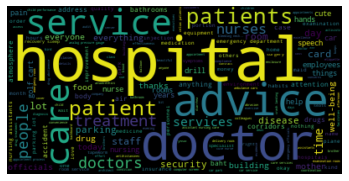

In [35]:
vizwordcloud(poshist)

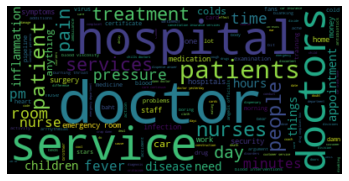

In [36]:
vizwordcloud(neghist)

# Plot Radar Chart

In [0]:
def groups(word):
    if word in ("doctor", "nurse", "student"):
        return "staff"
    elif word in ("hospital", "clinic", "equipment", "place"):
        return "infrastructure"
    elif word in ("service", "care", "treatment", "surgery", "disease", "medical care"):
        return "service"
    elif word in ("queue", "appointment"):
        return "process"
    elif word in ("price", "claim"):
        return "finance"
    else:
        return "others"

In [0]:
poshist["category"] = poshist["words"].apply(lambda x: groups(x))
poscount = poshist.groupby("category").size().reset_index(name="#")
poscount = poscount[poscount["category"] != "others"].reset_index(drop=True)

In [0]:
neghist["category"] = neghist["words"].apply(lambda x: groups(x))
negcount = neghist.groupby("category").size().reset_index(name="#")
negcount = negcount[negcount["category"] != "others"].reset_index(drop=True)

In [41]:
poscount

,category,#
0,infrastructure,3
1,process,1
2,service,5
3,staff,2


In [0]:
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode,  plot

In [43]:
fig = px.line_polar(poscount, r="#", theta="category", line_close=True)
plot(fig)

'temp-plot.html'

In [44]:
fig = px.line_polar(negcount, r="#", theta="category", line_close=True)
plot(fig)

'temp-plot.html'